In [1]:
#data loading
import pandas as pd
filename="/content/channing.csv"
a=pd.read_csv(str(filename))

print(a)

     rownames     sex  entry  exit  time  cens
0           1    Male    782   909   127     1
1           2    Male   1020  1128   108     1
2           3    Male    856   969   113     1
3           4    Male    915   957    42     1
4           5    Male    863   983   120     1
..        ...     ...    ...   ...   ...   ...
457       458  Female    968   990    22     1
458       459  Female    955   990    35     1
459       460  Female    837   911    74     1
460       461  Female    861   915    54     1
461       462  Female    967   983    16     1

[462 rows x 6 columns]


In [2]:
print(a.head())

   rownames   sex  entry  exit  time  cens
0         1  Male    782   909   127     1
1         2  Male   1020  1128   108     1
2         3  Male    856   969   113     1
3         4  Male    915   957    42     1
4         5  Male    863   983   120     1


In [3]:
print(a.tail())

     rownames     sex  entry  exit  time  cens
457       458  Female    968   990    22     1
458       459  Female    955   990    35     1
459       460  Female    837   911    74     1
460       461  Female    861   915    54     1
461       462  Female    967   983    16     1


In [4]:
##Checking for null values
a.isna().sum()

,0
rownames,0
sex,0
entry,0
exit,0
time,0
cens,0


In [9]:
from sklearn.preprocessing import LabelEncoder

b=LabelEncoder()


#transform string into int

a[a.columns[1]]=b.fit_transform(a[a.columns[1]])

print(a)

     rownames  sex  entry  exit  time  cens
0           1    1    782   909   122     1
1           2    1   1020  1128   104     1
2           3    1    856   969   109     1
3           4    1    915   957    41     1
4           5    1    863   983   116     1
..        ...  ...    ...   ...   ...   ...
457       458    0    968   990    22     1
458       459    0    955   990    34     1
459       460    0    837   911    72     1
460       461    0    861   915    53     1
461       462    0    967   983    16     1

[462 rows x 6 columns]


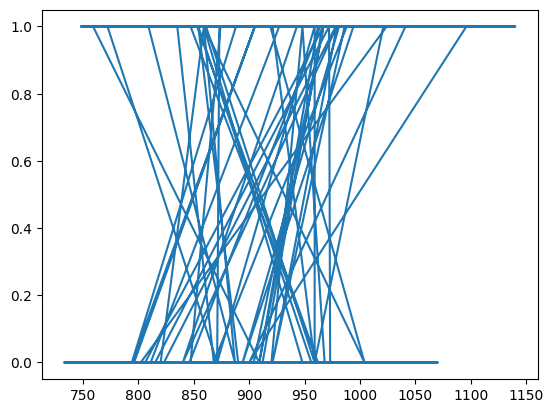

In [12]:
from matplotlib import pyplot as plt
target="cens"
index=2
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 462 artists>

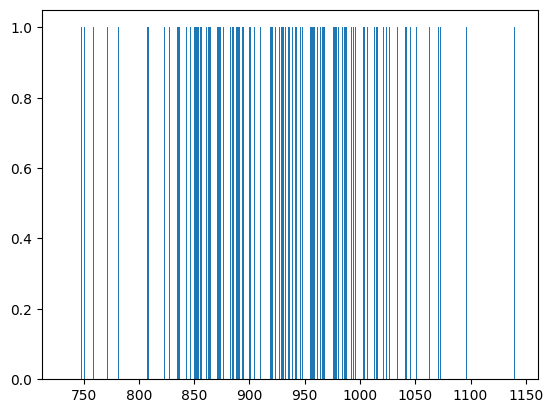

In [13]:
plt.bar(a[a.columns[2]],a[str(target)])

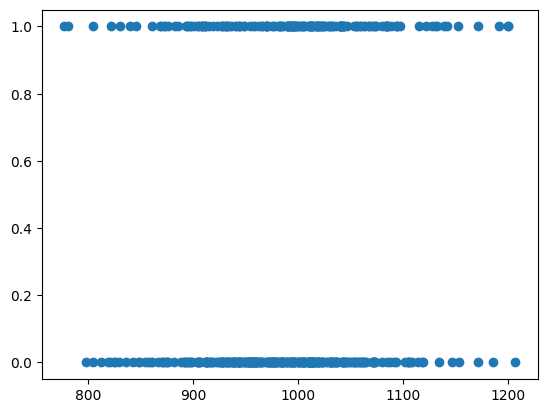

In [14]:
plt.scatter(a[a.columns[3]], a[str(target)])

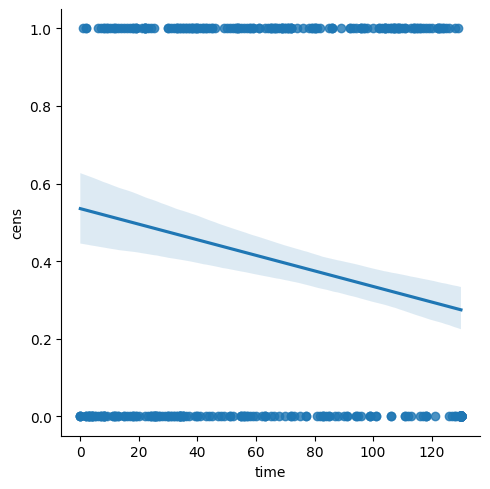

In [16]:
import seaborn as sns
#a["education"] = pd.to_numeric(a["education"])
#a["parttime"] = pd.to_numeric(a["parttime"])
sns.lmplot(x="time",y=str(target),data=a)

<Axes: xlabel='cens', ylabel='cens'>

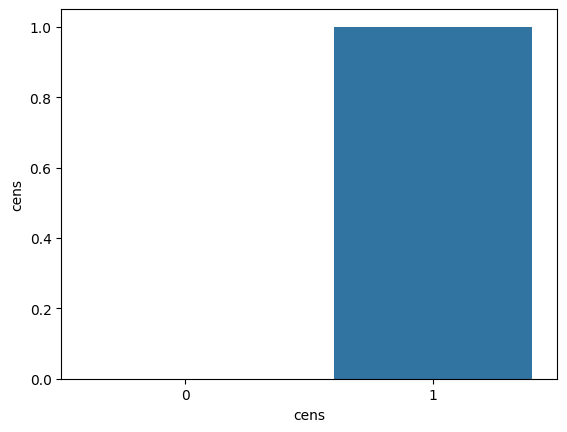

In [17]:
sns.barplot(x=a.columns[5],y=str(target),data=a)

<Axes: xlabel='sex', ylabel='cens'>

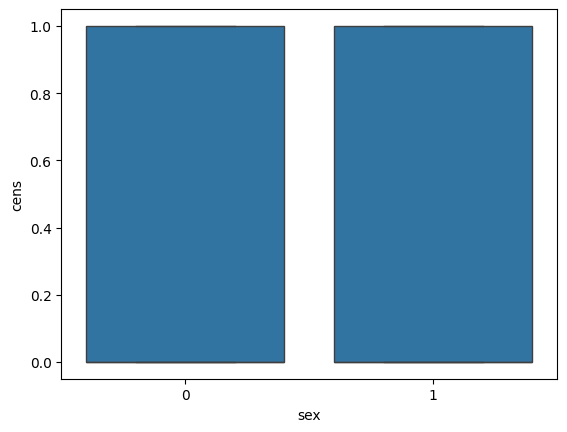

In [18]:
sns.boxplot(x=a.columns[1],y=str(target),data=a)

<ipython-input-19-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='cens', ylabel='Density'>

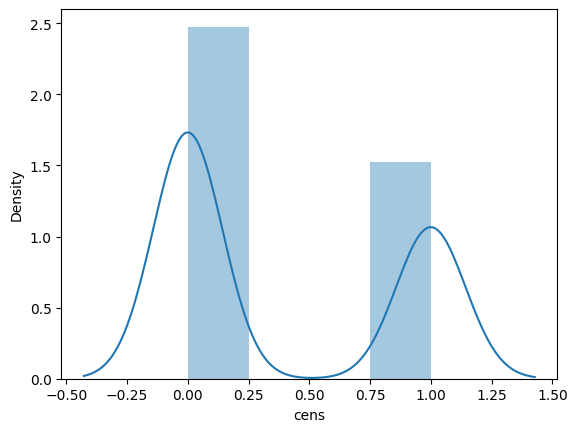

In [19]:
sns.distplot(a[str(target)])

<Axes: xlabel='sex', ylabel='Density'>

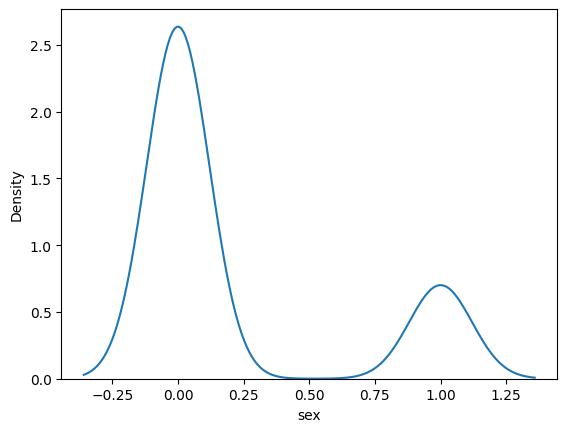

In [20]:
sns.kdeplot(a[a.columns[1]])

<Axes: xlabel='exit', ylabel='count'>

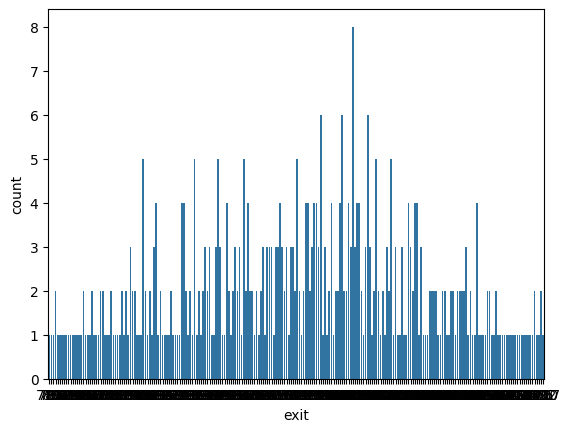

In [21]:
sns.countplot(x=a.columns[3],data=a)

<Axes: >

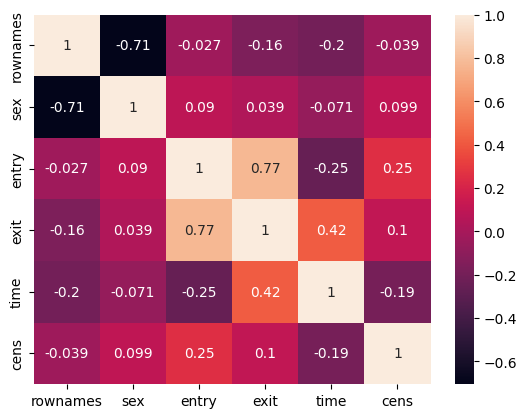

In [22]:
data=a.select_dtypes(include=np.number).corr()
sns.heatmap(data, annot=True)

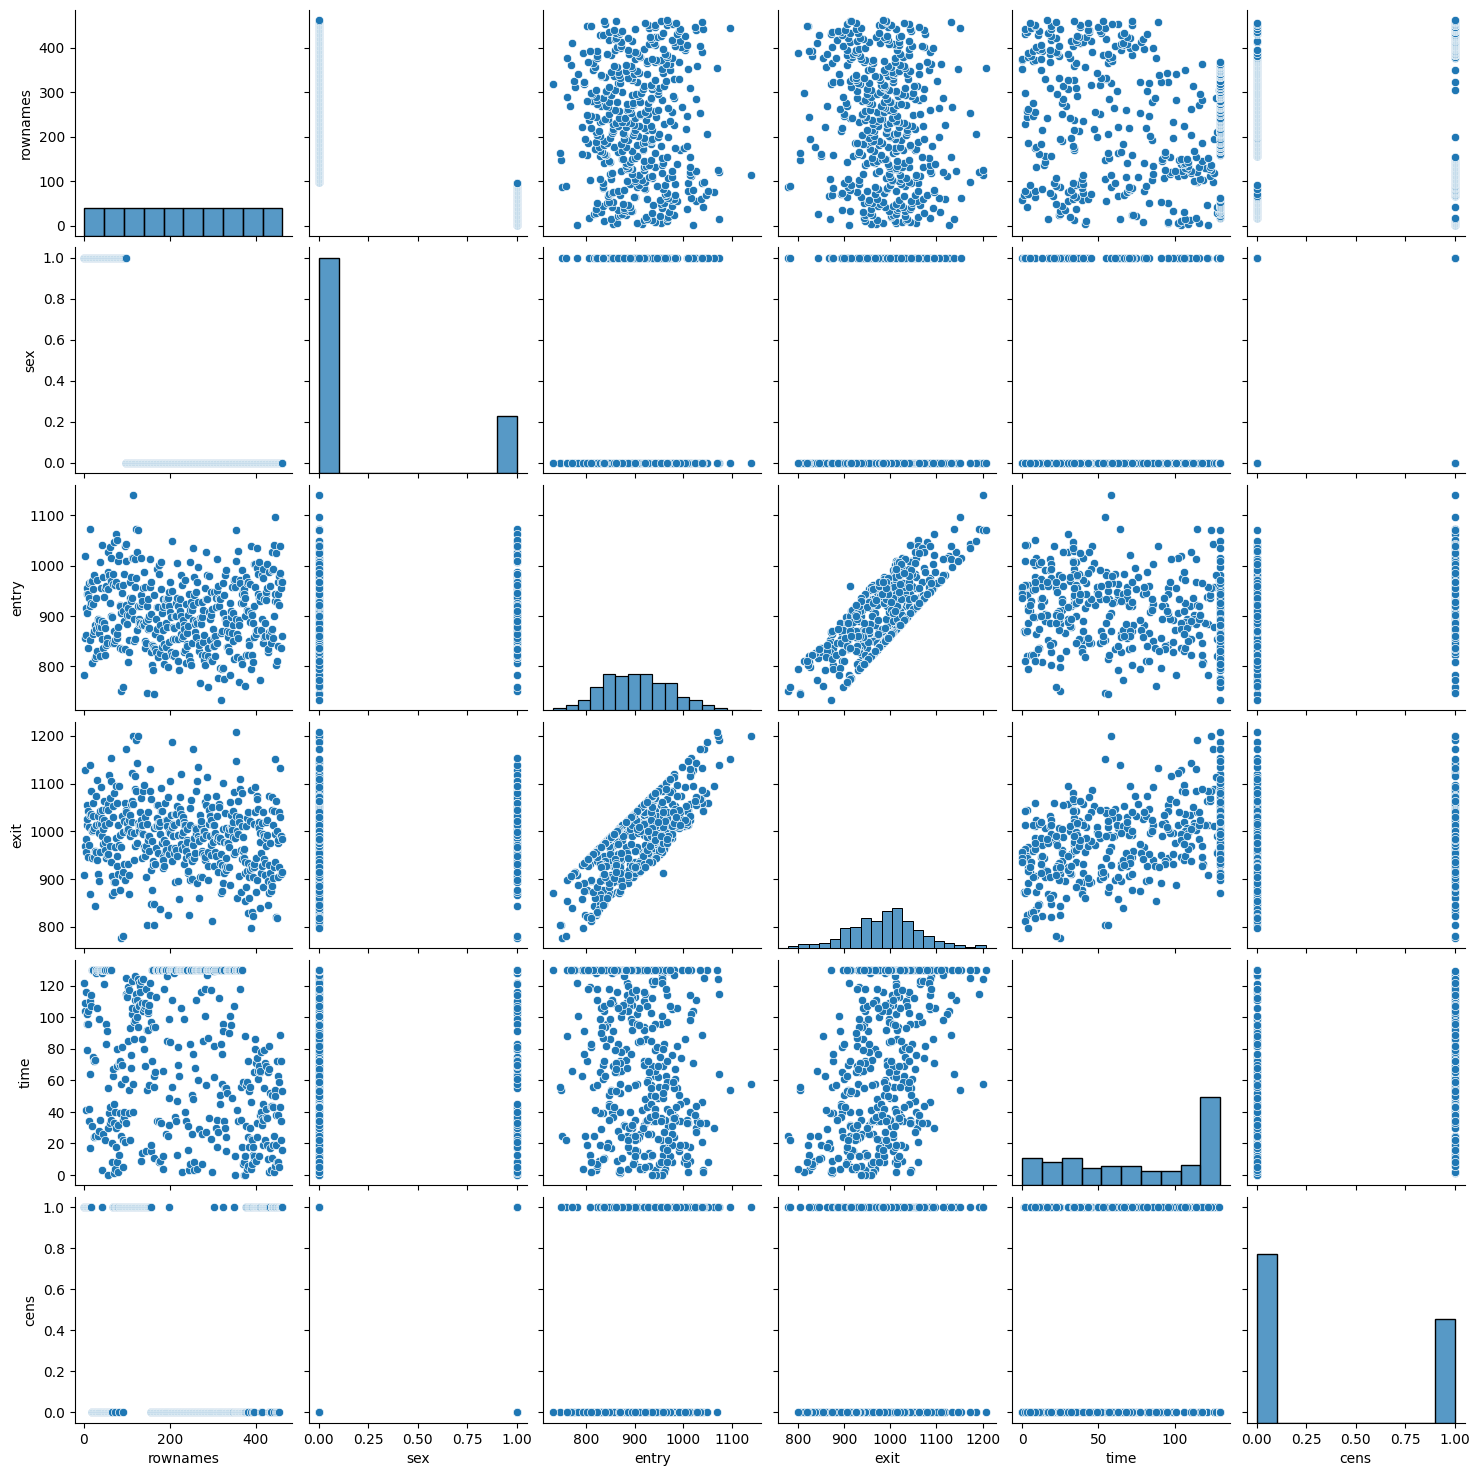

In [23]:
sns.pairplot(data=a)

In [24]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

     rownames  sex  entry  exit  time
0           1    1    782   909   122
1           2    1   1020  1128   104
2           3    1    856   969   109
3           4    1    915   957    41
4           5    1    863   983   116
..        ...  ...    ...   ...   ...
457       458    0    968   990    22
458       459    0    955   990    34
459       460    0    837   911    72
460       461    0    861   915    53
461       462    0    967   983    16

[462 rows x 5 columns]


In [25]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
457    1
458    1
459    1
460    1
461    1
Name: cens, Length: 462, dtype: int64


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [27]:
print(x_train)

     rownames  sex  entry  exit  time
387       388    0    794   798     4
419       420    0    933   990    55
400       401    0    864   873     9
78         79    1   1010  1012     2
354       355    0    895  1032   130
..        ...  ...    ...   ...   ...
252       253    0   1035  1172   130
313       314    0    920  1057   130
153       154    0   1013  1131   114
250       251    0    911   938    26
305       306    0    860   997   130

[369 rows x 5 columns]


In [28]:
print(y_train)

387    0
419    1
400    1
78     1
354    0
      ..
252    0
313    0
153    1
250    0
305    0
Name: cens, Length: 369, dtype: int64


In [29]:
print(x_test)

     rownames  sex  entry  exit  time
424       425    0    948  1019    69
154       155    0    967  1068    97
209       210    0    820   955   128
158       159    0    802   876    72
163       164    0    746   804    56
..        ...  ...    ...   ...   ...
216       217    0   1005  1053    47
176       177    0    827   836     9
181       182    0    838   975   130
227       228    0    856   993   130
137       138    0    886   994   104

[93 rows x 5 columns]


In [30]:
print(y_test)

424    1
154    1
209    0
158    0
163    0
      ..
216    0
176    0
181    0
227    0
137    1
Name: cens, Length: 93, dtype: int64


In [31]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
print(ypred)

[1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0
 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1]


In [33]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.7741935483870968


In [34]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[42 14]
 [ 7 30]]


In [36]:
print(model.predict([[425,0,948,1019,69]]))

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [37]:
from sklearn.tree import DecisionTreeClassifier
b=DecisionTreeClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [38]:
print(ypred)

[1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1
 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1]


In [40]:
print(model.predict([[425,0,948,1019,69]]))

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [41]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.9354838709677419


In [42]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[52  4]
 [ 2 35]]


In [43]:
from sklearn.ensemble import RandomForestClassifier
b=RandomForestClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [44]:
print(ypred)

[1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0
 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1]


In [46]:
print(model.predict([[425,0,948,1019,69]]))

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [47]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.967741935483871


In [48]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[54  2]
 [ 1 36]]


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.95      0.97      0.96        37

    accuracy                           0.97        93
   macro avg       0.96      0.97      0.97        93
weighted avg       0.97      0.97      0.97        93

